In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import files
uploaded = files.upload()

Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data.csv


In [39]:
trader_df=pd.read_csv('historical_data.csv')
sentiment_df=pd.read_csv('fear_greed_index.csv')

In [40]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [41]:
print(trader_df.info())
print(sentiment_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [42]:
# Rename columns for consistency
trader_df.rename(columns={
    'Closed PnL': 'closedpnl',
    'Size USD': 'size',
    'Timestamp IST': 'time',
    'Side': 'side'
}, inplace=True)

In [43]:
# Convert 'time' to datetime objects
trader_df['time']=pd.to_datetime(trader_df['time'],format='%d-%m-%Y %H:%M')

trader_df['date'] = trader_df['time'].dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

In [44]:
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='inner')

In [55]:
# Drop rows with missing values
merged_df.dropna(subset=['closedpnl', 'size', 'classification'], inplace=True)

print("\n""\n")
print("Merged Data Head with Standardized Columns:")
print(merged_df.head())
print("\n""\n")
print("Data Info after Cleaning and Merging:")
merged_df.info()





Merged Data Head with Standardized Columns:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens     size side                time  Start Position Direction  \
0       986.87  7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00   127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09  1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98  1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73    69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   closedpnl                                   Tran

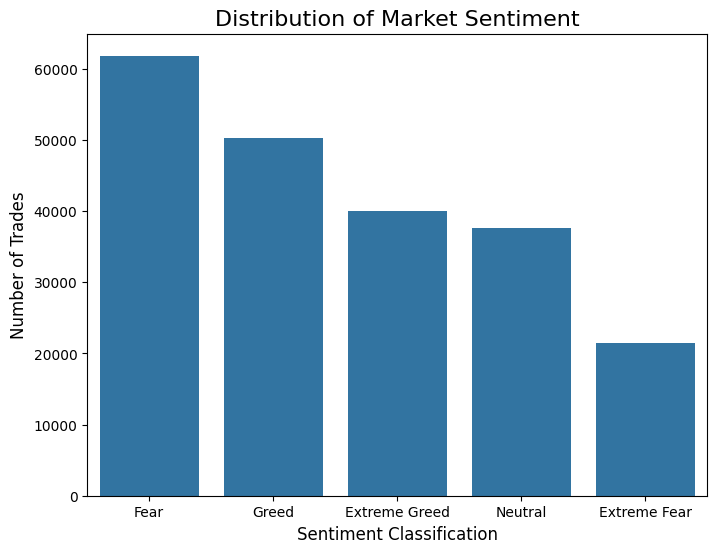

In [47]:
# 1. Analyze the distribution of Market Sentiment
plt.figure(figsize=(8, 6))
sentiment_counts = merged_df['classification'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Market Sentiment')
plt.ylabel('Number of Trades')
plt.xlabel('Sentiment Classification')
plt.show()

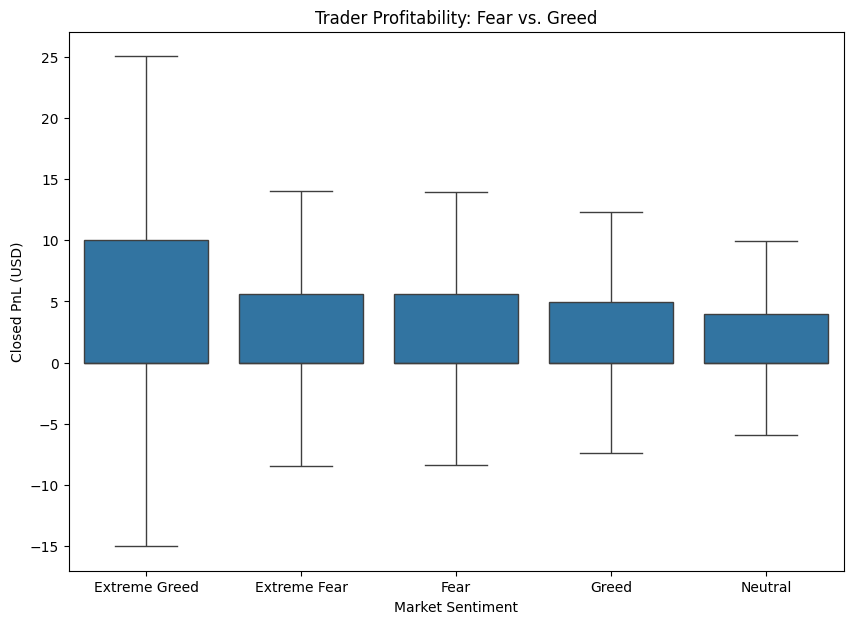

In [52]:
# 2. Analyze Profitability (closedpnl) vs. Market Sentiment
plt.figure(figsize=(10, 7))
sns.boxplot(x='classification', y='closedpnl', data=merged_df, showfliers=False) # Removing outliers for better visualization
plt.title('Trader Profitability: Fear vs. Greed')
plt.ylabel('Closed PnL (USD)')
plt.xlabel('Market Sentiment')
plt.show()

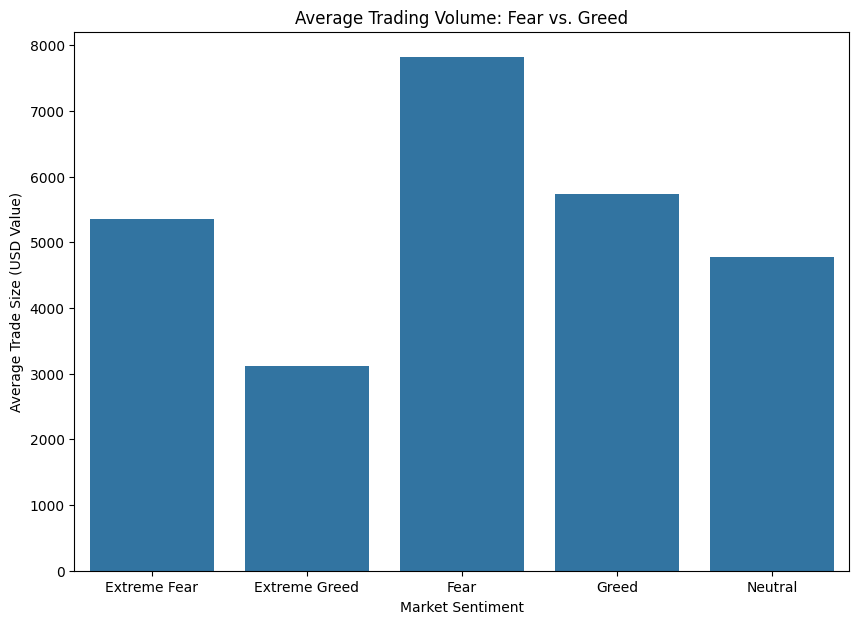

In [51]:
 # Analyze Trading Volume (size) vs. Market Sentiment
avg_volume = merged_df.groupby('classification')['size'].mean().reset_index()
plt.figure(figsize=(10, 7))
sns.barplot(x='classification', y='size', data=avg_volume)
plt.title('Average Trading Volume: Fear vs. Greed')
plt.ylabel('Average Trade Size (USD Value)')
plt.xlabel('Market Sentiment')
plt.show()

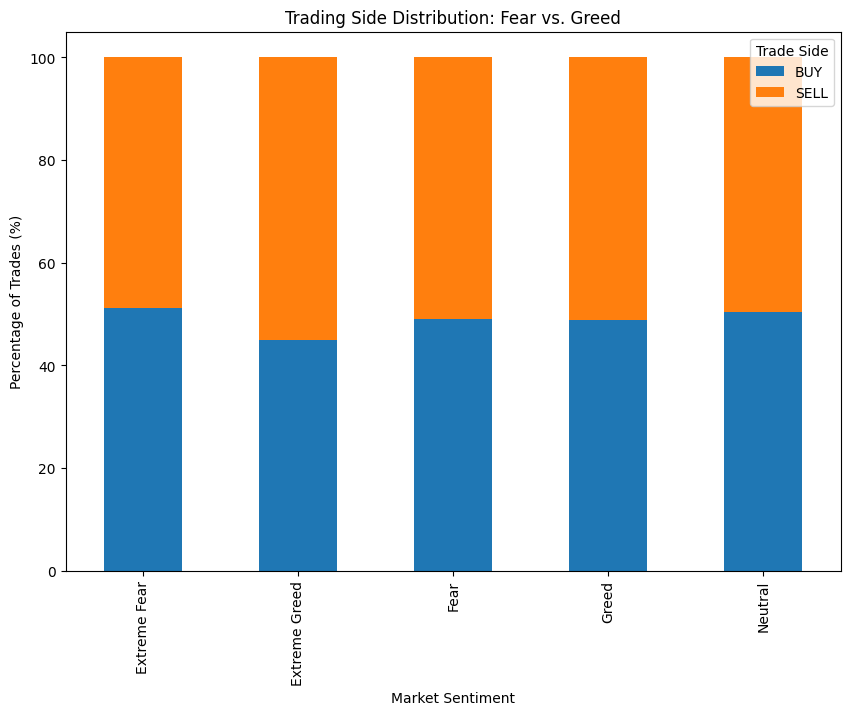

In [50]:
 #4. Analyze Trade Side (Buy vs. Sell) vs. Market Sentiment
side_sentiment = merged_df.groupby(['classification', 'side']).size().unstack().fillna(0)
side_sentiment_percentage = side_sentiment.div(side_sentiment.sum(axis=1), axis=0) * 100

side_sentiment_percentage.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Trading Side Distribution: Fear vs. Greed')
plt.ylabel('Percentage of Trades (%)')
plt.xlabel('Market Sentiment')
# plt.xticks(rotation=0)
plt.legend(title='Trade Side')
plt.show()

In [54]:
# Calculate and print key statistics
pnl_summary = merged_df.groupby('classification')['closedpnl'].describe()
volume_summary = merged_df.groupby('classification')['size'].describe()

print("\n"  "\n")
print("Summary of Profitability (PnL) by Sentiment:")
print(pnl_summary)
print("\n" "\n")
print("Summary of Trading Volume by Sentiment:")
print(volume_summary)




Summary of Profitability (PnL) by Sentiment:
                  count       mean          std           min  25%  50%  \
classification                                                            
Extreme Fear    21400.0  34.537862  1136.056091  -31036.69194  0.0  0.0   
Extreme Greed   39992.0  67.892861   766.828294  -10259.46800  0.0  0.0   
Fear            61837.0  54.290400   935.355438  -35681.74723  0.0  0.0   
Greed           50303.0  42.743559  1116.028390 -117990.10410  0.0  0.0   
Neutral         37686.0  34.307718   517.122220  -24500.00000  0.0  0.0   

                      75%           max  
classification                           
Extreme Fear     5.635032  115287.00000  
Extreme Greed   10.028709   44223.45187  
Fear             5.590856  135329.09010  
Greed            4.944105   74530.52371  
Neutral          3.995795   48504.09555  



Summary of Trading Volume by Sentiment:
                  count         mean           std   min       25%      50%  \
classifica